# Visualizing Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os.path
import subprocess

Helpers for Getting, Loading and Locating Data

In [2]:
def wget_data(url: str):
    local_path = './tmp_data'
    p = subprocess.Popen(["wget", "-nc", "-P", local_path, url], stderr=subprocess.PIPE, encoding='UTF-8')
    rc = None
    while rc is None:
      line = p.stderr.readline().strip('\n')
      if len(line) > 0:
        print(line)
      rc = p.poll()

def locate_data(name, check_exists=True):
    local_path='./tmp_data'
    path = os.path.join(local_path, name)
    if check_exists and not os.path.exists(path):
        raise RuxntimeError('No such data file: {}'.format(path))
    return path

## <span style="color:Orange">Get Data</span>

In [ ]:
wget_data('https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/data/line_data.csv')
wget_data('https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/data/pong_data.hf5')
wget_data('https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/data/pong_targets.hf5')

## <span style="color:Orange">Load Data</span>

In [4]:
line_data    = pd.read_csv(locate_data('line_data.csv'))
pong_data    = pd.read_hdf(locate_data('pong_data.hf5'))
pong_targets = pd.read_hdf(locate_data('pong_targets.hf5'))
pong_both    = pd.concat([pong_data, pong_targets], axis='columns')

## <span style="color:Orange">Low-level Plots</span>

The low-level historical foundation of python visualization is [matplotlib](https://matplotlib.org/), which was originally created to emulate the successful MATLAB graphics beloved by generations of engineers. Matplotlib is still relevant today, and often the best choice for simple tasks or to produce publication-quality plots. The downside of matplotlib is that relatively simple tasks often require many low-level steps.

Use `plt.hist`, `plt.xlabel`, `plt.ylabel` and `plt.legend` to reproduce the plot below that shows the 1D distributions ("histograms") of $x$ and $y$ values in `line_data`. Note how this goes one step further than the summary statistics by showing the full distribution of a single column.

<div>
<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Visualization-hist.png" width=600></img>
</div>

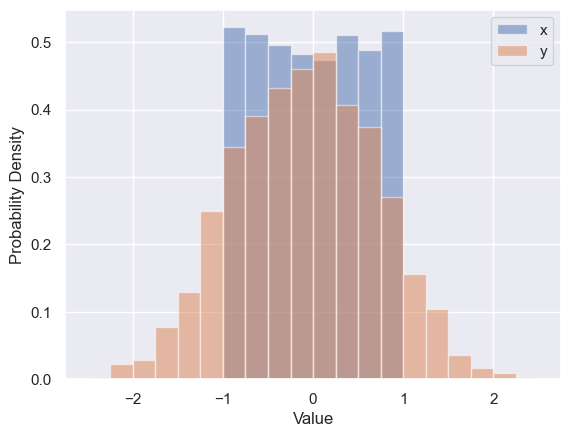

In [5]:
plt.hist(line_data['x'], bins=20, range=(-2.5, +2.5), label='x', density=True, alpha=0.5)
plt.hist(line_data['y'], bins=20, range=(-2.5, +2.5), label='y', density=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

Use `plt.errorbar`, `plt.xlabel`, `plt.ylabel` and `plt.legend` to reproduce the plot below that shows the first 12 rows of `line_data`:

<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Visualization-errorbar.png" width=600 align=left></img><br>

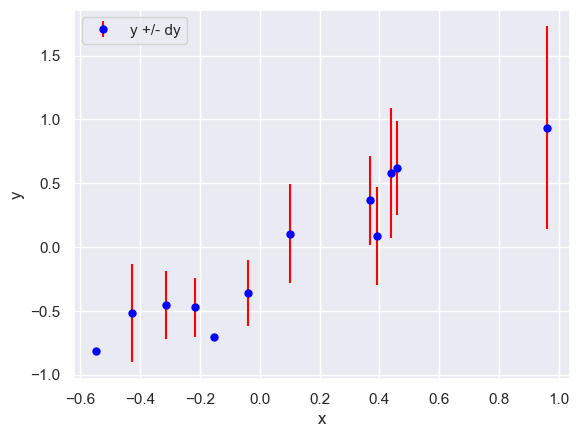

In [6]:
plt.errorbar(line_data['x'][:12], line_data['y'][:12], line_data['dy'][:12],
             fmt='o', color='blue', markersize=5, ecolor='red', label='y +/- dy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

Use `plt.scatter`, `plt.xlabel`, `plt.ylabel` and `plt.colorbar` to reproduce the plot below that shows the 2D distribution of $x$ and $y$ in `line_data`, color coded by each row's $dy$ value. Note how this type of plot reveals correlations between a pair of columns that cannot be deduced from their 1D histograms.

<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Visualization-scatter.png" width=600 align=left></img><br>

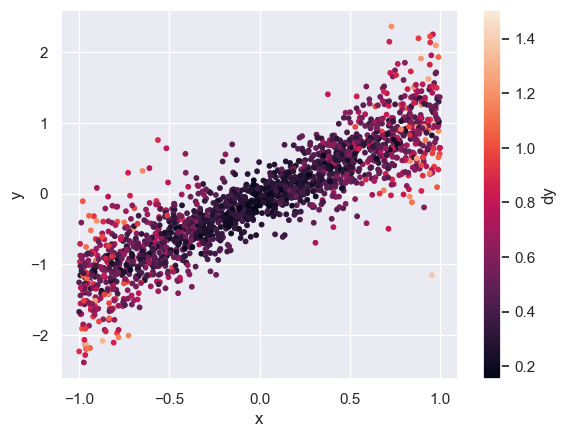

In [7]:
plt.scatter(line_data['x'], line_data['y'], c=line_data['dy'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar().set_label('dy')

## <span style="color:Orange">Higher-level Plots</span>

Visualization tools are rapidly evolving in python today (see [this PyTexas 2023 talk](https://www.youtube.com/watch?v=8du4NNoOtII) and [this PyCon AU 2023 talk](https://www.youtube.com/watch?v=CvcYzJIp2Bk) for recent overviews of 2D and 3D visualization in Python, respectively), and there is no single best choice for all applications.

For this course, we will use [seaborn](https://seaborn.pydata.org/index.html) since it is specifically designed for statistical data visualization and is reasonably mature. It also works well with matplotlib, which it uses under the hood to produce its plots.

The Seaborn version of `plt.hist` is `sns.histplot`, which automatically calculates optimized bins (using the [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)) and superimposes a smooth estimate of the probability density (using the [KDE method](https://en.wikipedia.org/wiki/Kernel_density_estimation) - we will learning more about density estimation soon).

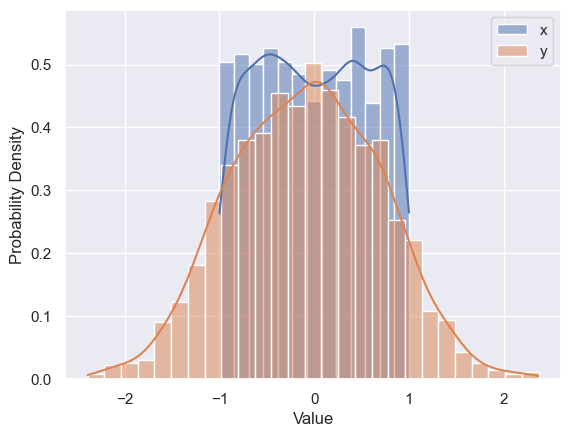

In [8]:
sns.histplot(line_data['x'], label='x', kde=True, stat="density")
sns.histplot(line_data['y'], label='y', kde=True, stat="density")
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

The Seaborn version of `plt.scatter` is `sns.jointplot`, which shows 1D histograms along the sides comes in several kinds for displaying the central 2D information, e.g.

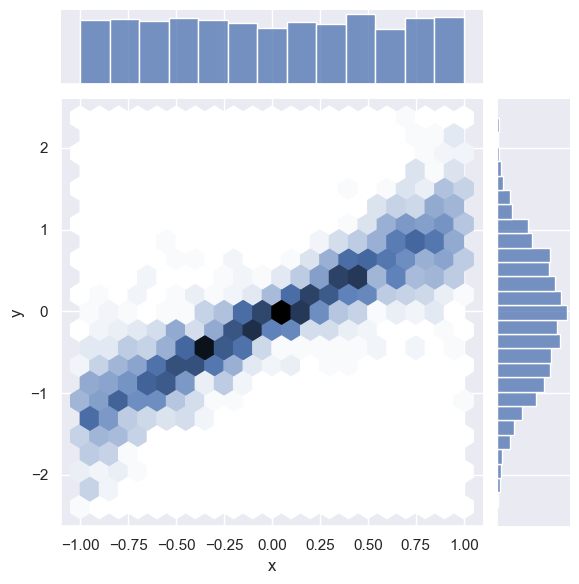

In [9]:
sns.jointplot(line_data, x='x', y='y', kind='hex');

Note how the axis labels are generated automatically.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

___<span style="color:violet">EXERCISE</span>___: Read about the other kinds of `sns.jointplot` and try each one for $x$ and $y$.  Which seems most useful for a small data set?  For a large data set?

I recommend 'scatter' for a small dataset, but it is not a good choice for a large dataset since it is relatively slow and your eye is inevitably drawn to the outliers that are least representative of the general trends.

For a large dataset, I would start with `hex` and then proceed to `kde` if the `hex` distribution looks sufficiently smooth.

The `reg` and `resid` types are intended for cases where there is an obvious linear relationship between the pair of columns.

A "jointplot" gives a lot of insight into a pair of columns in a dataset.  A "pairplot" takes this one step further with a grid of jointpoints. (There is also a dedicated python package for pairplots called [corner](http://corner.readthedocs.io/en/latest/)).

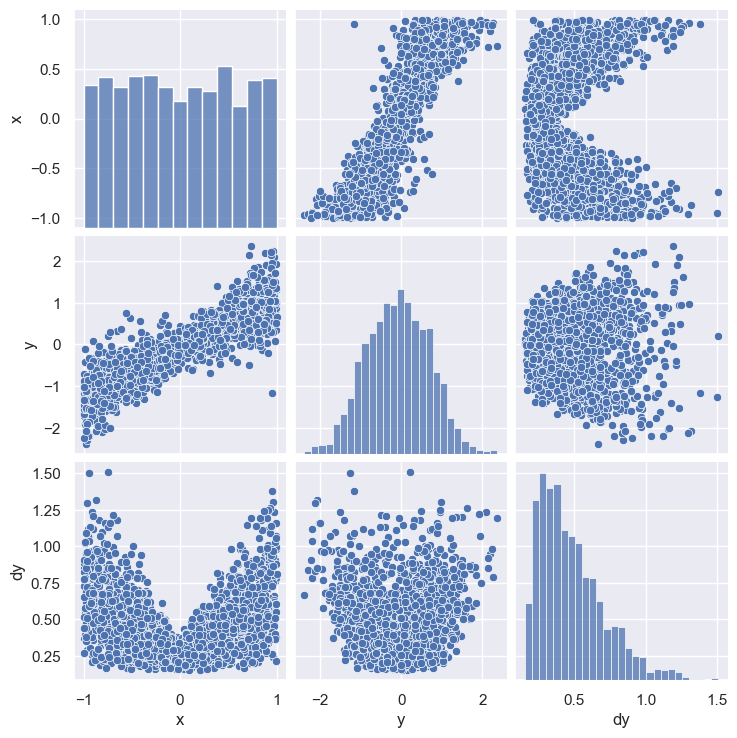

In [10]:
sns.pairplot(line_data.dropna())
plt.show()

The resulting grid shows a 2D scatter plot each pair ($i$,$j$) of columns with 1D histograms on the diagonal ($i$=$j$). Note that the ($j$,$i$) scatter plot is just ($i$,$j$) transposed, so this format is not very space efficient.

A pairplot is less practical for a dataset with lots of columns but you can zoom in on any submatrix, for example:

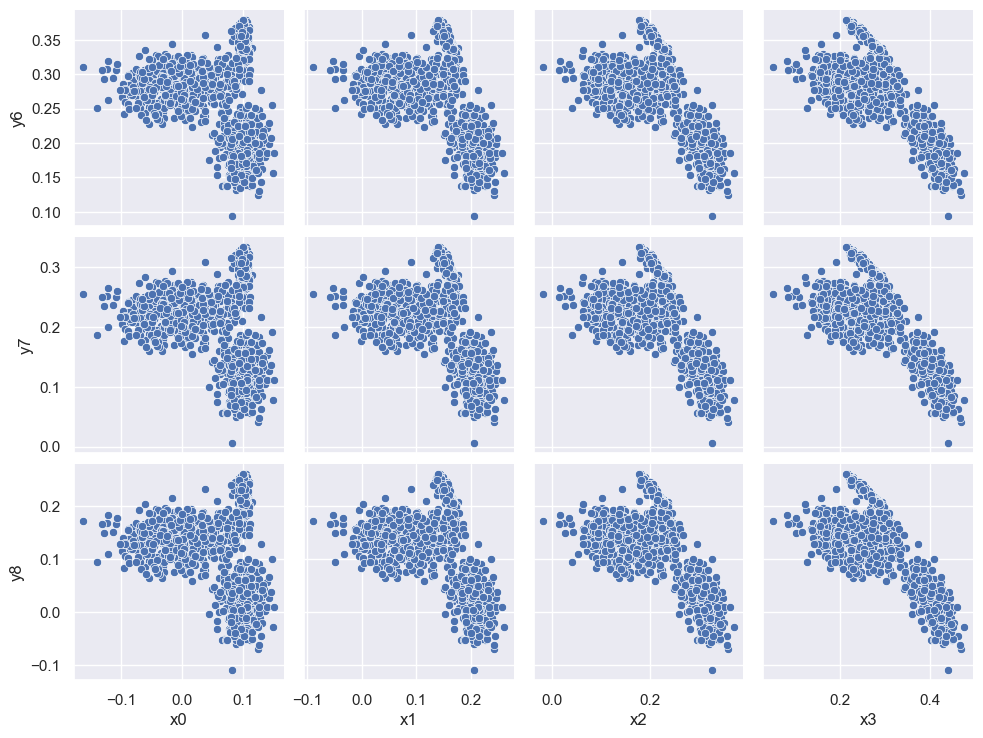

In [11]:
sns.pairplot(pong_both, x_vars=('x0', 'x1', 'x2', 'x3'), y_vars=('y6', 'y7', 'y8'))
plt.show()

The three clusters that appear in each scatter plot suggest that there are three types of observations (rows) in the dataset.  We can confirm this using the combined data+targets dataset and color-coding each row according to each target `grp` value:

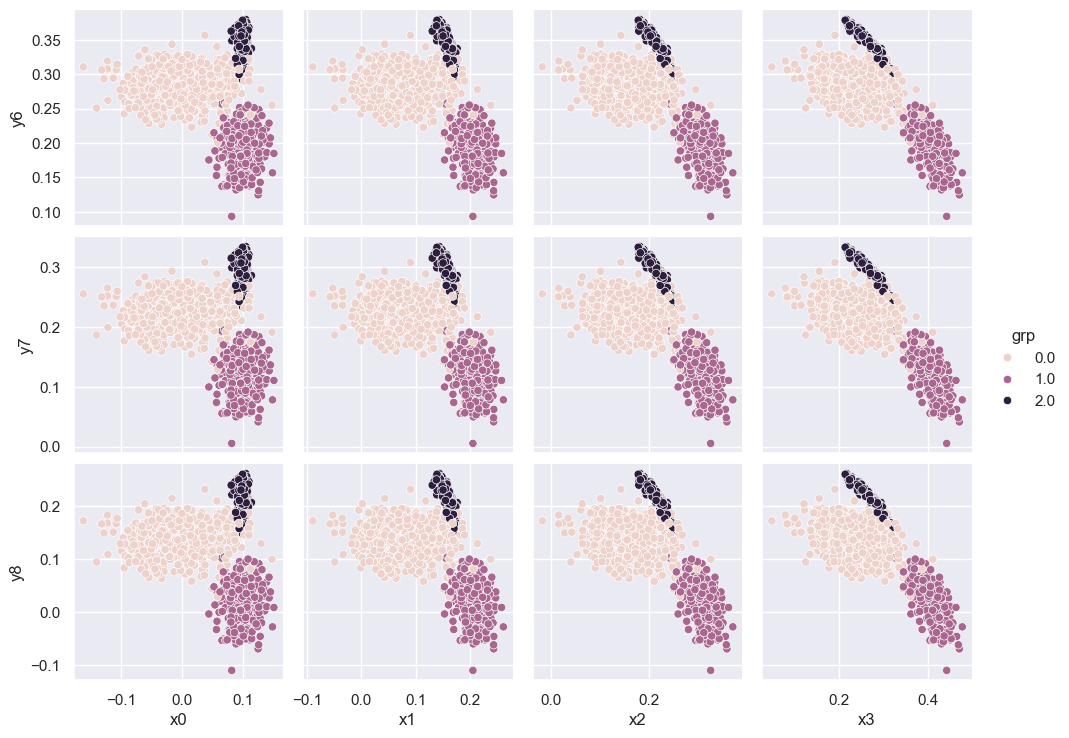

In [12]:
sns.pairplot(pong_both, x_vars=('x0', 'x1', 'x2', 'x3'), y_vars=('y6', 'y7', 'y8'), hue='grp')
plt.show()

We will soon learn how to automatically assign rows to the clusters you discover during visualization, i.e., without "cheating" with the target `grp` column.

## <span style="color:Orange">Beyond 2D</span>

There are several options to go beyond 2D visualization of pairs:
- Use attributes such as color and size to display additional dimensions.

- Use 3D visualizations.

- Use an embedding transformation to map high dimensional data to 2D or 3D.

We have already seen examples above of using color to add a third dimension to a 2D scatter plot.

<hr style="border:1px solid rgba(255, 255, 255, 1); margin: 2em 0;">

__<span style="color:violet">EXERCISE</span>__: Try out the embedding approach by uploading `pong_data` to http://projector.tensorflow.org/. You will first need to save the data in the "tab-separated value" (TSV) format:

In [13]:
pong_data.to_csv('pong_data.tsv', sep='\t', index=False, header=False)

Look at the 3D PCA visualization of this dataset. What is the raw dimension (number of columns) for this data?  What is the effective number of dimensions revealed by the visualization?  We will learn more about PCA and counting effective dimensions soon.

You are welcome to also experiment with the <span style="color:violet">t-Distributed Stochastic Neighbor Embedding</span> [(tSNE)](https://distill.pub/2016/misread-tsne/) visualizations. tSNE is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. It uses a Stochastic Neighbor Embedding method developed by Sam Roweis and Geoffrey Hinton in 2020 which models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

Several dimensionality reduction (projection) techniques exist, such as [UMAP](https://umap-learn.readthedocs.io), [Isomap](https://scikit-learn.org/stable/modules/manifold.html#isomap), and many others. I have not found these to be very enlightening for scientific data, but I'm sure that I haven't explored them sufficiently.

## <span style="color:Orange">How to use visualization</span>

What should you be looking for when you visualize your data?
1. Is there visible clustering in some pairs?

2. Which pairs of columns are most correlated?

3. When a correlation exists:
    - Is it roughly linear or strongly non-linear?

    - How much variance (spread) is there about the average trend?

There is usually variance around the average trend but it can arise from two different sources (and, in general, is some mixture of both):
 - Correlations with additional variables (which might not even be in your dataset).

 - Random noise due to the measurement process, etc.

## <span style="color:Orange">Acknowledgments</span>

* Initial version: Mark Neubauer

© Copyright 2025